In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


In [113]:
# download file: 

import requests


url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls', 'wb').write(r.content)

591360

# read data

In [2]:
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls")
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-18,18,3,2020,1,0,Afghanistan,AF
1,2020-03-17,17,3,2020,5,0,Afghanistan,AF
2,2020-03-16,16,3,2020,6,0,Afghanistan,AF
3,2020-03-15,15,3,2020,3,0,Afghanistan,AF
4,2020-03-11,11,3,2020,3,0,Afghanistan,AF
...,...,...,...,...,...,...,...,...
5524,2020-01-04,4,1,2020,0,0,Vietnam,VN
5525,2020-01-03,3,1,2020,0,0,Vietnam,VN
5526,2020-01-02,2,1,2020,0,0,Vietnam,VN
5527,2020-01-01,1,1,2020,0,0,Vietnam,VN


# explore data

In [3]:
df.groupby("Countries and territories")["Cases"].sum()

Countries and territories
Afghanistan                   22
Albania                       55
Algeria                       60
Andorra                       14
Antigua_and_Barbuda            1
                            ... 
United_States_of_America    6427
Uruguay                       50
Uzbekistan                    16
Venezuela                     33
Vietnam                       61
Name: Cases, Length: 149, dtype: int64

In [4]:
df[df["Countries and territories"]=="United_States_of_America"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
5364,2020-03-18,18,3,2020,1766,23,United_States_of_America,US
5365,2020-03-17,17,3,2020,887,16,United_States_of_America,US
5366,2020-03-16,16,3,2020,823,12,United_States_of_America,US
5367,2020-03-15,15,3,2020,777,10,United_States_of_America,US
5368,2020-03-14,14,3,2020,511,7,United_States_of_America,US
...,...,...,...,...,...,...,...,...
5438,2020-01-04,4,1,2020,0,0,United_States_of_America,US
5439,2020-01-03,3,1,2020,0,0,United_States_of_America,US
5440,2020-01-02,2,1,2020,0,0,United_States_of_America,US
5441,2020-01-01,1,1,2020,0,0,United_States_of_America,US


In [5]:
df[df["DateRep"]=="2020-03-18"].sort_values(by=['Cases'], ascending=False)[:50]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
2691,2020-03-18,18,3,2020,3526,347,Italy,IT
4717,2020-03-18,18,3,2020,1987,182,Spain,ES
5364,2020-03-18,18,3,2020,1766,23,United_States_of_America,US
2382,2020-03-18,18,3,2020,1178,135,Iran,IR
1958,2020-03-18,18,3,2020,1144,0,Germany,DE
1797,2020-03-18,18,3,2020,1097,27,France,FR
4951,2020-03-18,18,3,2020,450,5,Switzerland,CH
5283,2020-03-18,18,3,2020,407,5,United_Kingdom,UK
320,2020-03-18,18,3,2020,316,0,Austria,AT
3519,2020-03-18,18,3,2020,292,0,Netherlands,NL


# visual explore

In [6]:
# logistic function
from scipy.stats import logistic

def logistic_dNdt(t, norm, tpeak, width):
    return logistic.pdf(t, tpeak, width) * norm


# exponential 

def exp(t, norm, t0, trise):
    return norm*np.exp((t-t0)/trise)


import scipy

def chisq(y_vals, y_expected, y_errs, num_params=1):
    #returns chi2, dof, red_chi2
    #  for reduced chisq test, under the assumption of Poisson counting
    #  we have lnL = const - (1/2.)*chi2
    if y_vals.shape[0] != y_expected.shape[0]:
        print("Inconsistent input sizes")
        return
    #z = (y_vals[i] - y_expected[i]) / y_errs[i]    
    z = (y_vals - y_expected) / y_errs
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (y_vals.shape[0] - num_params)
    return chi2, (y_vals.shape[0] - num_params), chi2dof


def fit_factory_boundMC(model, x, y, dy=None, p0=[1.2e-11, -3.6], Nsim=500, plotEs=None):
    if dy is not None:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0,
                                           sigma=dy, 
                                             absolute_sigma=True) #approx abs
    else:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0)
        
    for i in range(len(p0)):
        print("best-fit param %d = %.4g +/- %.4g" % (i, paramsPLlog[i], np.sqrt(abs(covariacesPLlog[i,i]))))

    
    # Use some MC
    #print(type(x), x)
    #print(float(x[0]), float(x[-1]))
    if plotEs is not None: 
        x_values = plotEs
    else:
        x_values = np.logspace(np.log10(float(x[0])), np.log10(float(x[-1])), 100)
    rng = np.random.RandomState(seed=76)
    parameter_samples = rng.multivariate_normal(paramsPLlog, covariacesPLlog, Nsim)
    #print(paramsPLlog, covariacesPLlog)
    
    #print(parameter_samples.shape)
    realizations = np.array([model(x_values, *pars) for pars in parameter_samples])

    qlo = 100 * scipy.stats.norm.cdf(-1)    #1 is the 1 sigma
    y_low = np.percentile(realizations, qlo, axis=0)
    qhi = 100 * scipy.stats.norm.cdf(1)     #1 is the 1 sigma
    y_high = np.percentile(realizations, qhi, axis=0)
    
    #print(y_low.shape)
    
    return paramsPLlog, np.diag(covariacesPLlog)**0.5, x_values, y_low, y_high





In [7]:
df["DateRep"].min()

Timestamp('2019-12-31 00:00:00')

/home/qifeng/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Daily New Cases')

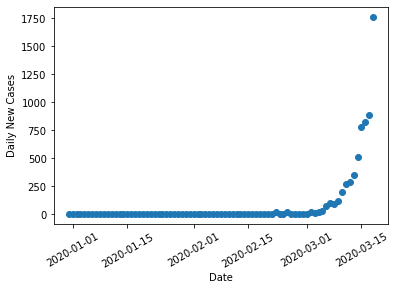

In [8]:
dfus = df[df["Countries and territories"]=="United_States_of_America"]

fig, ax = plt.subplots()

#plot
plt.plot(dfus["DateRep"], dfus["Cases"], marker="o", ls="")


#set tick labels
plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Date")
plt.ylabel("Daily New Cases")


In [9]:
# experiment turning dates to relative changes in unit of day; note it's inverted
t0 = df["DateRep"].min()

(dfus["DateRep"]-t0)/ np.timedelta64(1, 'D')

5364    78.0
5365    77.0
5366    76.0
5367    75.0
5368    74.0
        ... 
5438     4.0
5439     3.0
5440     2.0
5441     1.0
5442     0.0
Name: DateRep, Length: 79, dtype: float64

best-fit param 0 = 225.5 +/- 2.755e+08
best-fit param 1 = 71.31 +/- 4.195e+06
best-fit param 2 = 3.437 +/- 0.1283


/home/qifeng/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


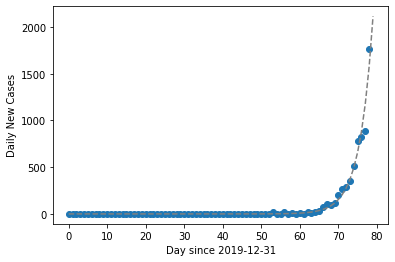

In [10]:
fig, ax = plt.subplots()

#plot
t0 = df["DateRep"].min()
plt.plot((dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), dfus["Cases"], marker="o", ls="")

#fit; US is still in early exponential phase

plot_ts = np.arange(0,80,1.0)
#ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
#                                                (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
#                                                 dfus["Cases"].values,  
#                                                       p0=[2000, 85, 5], 
#                                                        plotEs=plot_ts)

ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(exp, 
                                                 (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
                                                 dfus["Cases"].values,  
                                                 p0=[1000, 70, 3], 
                                                 plotEs=plot_ts)

model_ = exp(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set tick labels
#plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#save plot
plt.savefig("US_COVID_Mar18.png")


best-fit param 0 = 225.5 +/- 2.755e+08
best-fit param 1 = 71.31 +/- 4.195e+06
best-fit param 2 = 3.437 +/- 0.1283


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


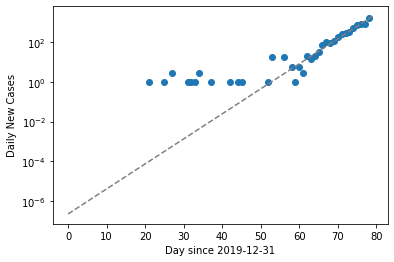

In [11]:
fig, ax = plt.subplots()

#plot
t0 = df["DateRep"].min()
plt.plot((dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), dfus["Cases"], marker="o", ls="")

#fit; US is still in early exponential phase

plot_ts = np.arange(0,80,1.0)
#ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
#                                                (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
#                                                 dfus["Cases"].values,  
#                                                       p0=[2000, 85, 5], 
#                                                        plotEs=plot_ts)

ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(exp, 
                                                 (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
                                                 dfus["Cases"].values,  
                                                 p0=[1000, 70, 3], 
                                                 plotEs=plot_ts)

model_ = exp(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set tick labels
#plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#
plt.yscale('log')

#save plot
plt.savefig("US_COVID_Mar18_semilog.png")


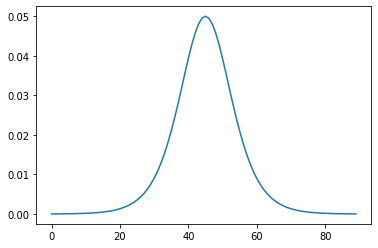

In [12]:
# logistic funciton pdf example
plot_ts = np.arange(0,90,1.0)
plt.plot(plot_ts, logistic.pdf(plot_ts, 45, 5))

best-fit param 0 = 8.181e+04 +/- 9183
best-fit param 1 = 41.27 +/- 0.8988
best-fit param 2 = 4.548 +/- 0.6293


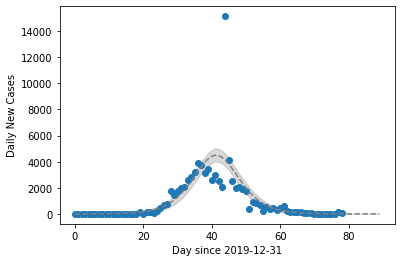

In [13]:
dfch = df[df["Countries and territories"]=="China"]

t0ch = dfch["DateRep"].min()

ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]

plt.plot(ts_rel_ch, dfch["Cases"].values[::-1], marker="o", ls="")

#fit
plot_ts = np.arange(0,90,1.0)
ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
                                                      ts_rel_ch, 
                                                       dfch["Cases"].values[::-1],  
                                                       p0=[4000, 35, 5], 
                                                        plotEs=plot_ts)
model_ = logistic_dNdt(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#save plot
plt.savefig("China_COVID_Mar18.png")


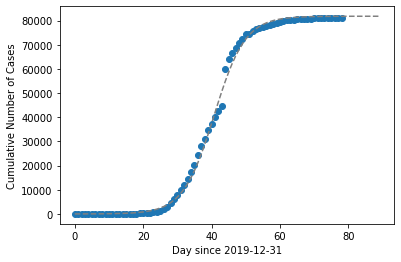

In [14]:
cumch = np.cumsum(dfch["Cases"].values[::-1])
plt.plot(ts_rel_ch, cumch, marker="o", ls="")
plt.plot(plot_ts, np.cumsum(model_), color="gray", ls='--')

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Cumulative Number of Cases")

#save plot
plt.savefig("China_COVID_Mar18_cum.png")



In [15]:
# home work
# look at Italy and South Korea

In [18]:
def check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5]):
    dfch = df[df["Countries and territories"]==country]

    t0ch = dfch["DateRep"].min()

    ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]

    plt.plot(ts_rel_ch, dfch["Cases"].values[::-1], marker="o", ls="")

    #fit
    plot_ts = np.arange(0,90,1.0)
    ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(model, 
                                                          ts_rel_ch, 
                                                           dfch["Cases"].values[::-1],  
                                                           p0=p0, 
                                                            plotEs=plot_ts)
    model_ = model(plot_ts, *ps_) 
    plt.plot(plot_ts, model_, color="gray", ls='--')
    plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Daily New Cases")

    #save plot
    plt.savefig("{}_COVID_Mar18.png".format(country))
    
    #
    plt.figure()
    cumch = np.cumsum(dfch["Cases"].values[::-1])
    plt.plot(ts_rel_ch, cumch, marker="o", ls="")
    plt.plot(plot_ts, np.cumsum(model_), color="gray", ls='--')

    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Cumulative Number of Cases")

    #save plot
    plt.savefig("{}_COVID_Mar18_cum.png".format(country))




In [24]:
df["Countries and territories"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia_and_Herzegovina', 'Brazil', 'Brunei_Darussalam',
       'Bulgaria', 'Burkina_Faso', 'Cambodia', 'Cameroon', 'CANADA',
       'Canada', 'Cases_on_an_international_conveyance_Japan',
       'Central_African_Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech_Republic', 'Democratic_Republic_of_the_Congo', 'Denmark',
       'Dominican_Republic', 'Ecuador', 'Egypt', 'Equatorial_Guinea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Holy_See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 

best-fit param 0 = 8.181e+04 +/- 9183
best-fit param 1 = 41.27 +/- 0.8988
best-fit param 2 = 4.548 +/- 0.6293


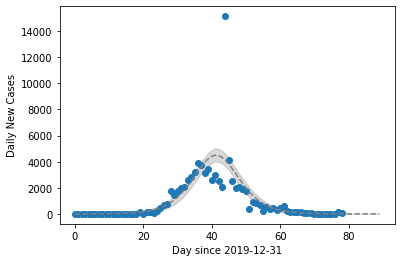

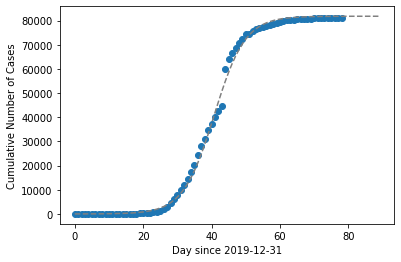

In [19]:
check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5])

best-fit param 0 = 8380 +/- 308.7
best-fit param 1 = 62.37 +/- 0.2064
best-fit param 2 = 3.187 +/- 0.145


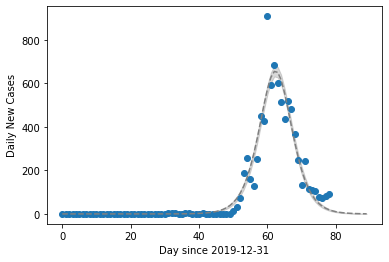

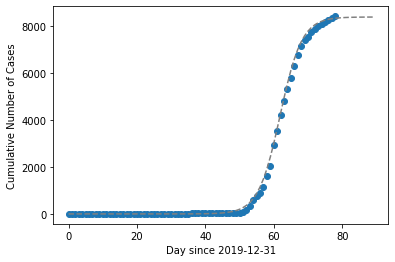

In [25]:
check_country(country="South_Korea", model=logistic_dNdt, p0=[4000, 35, 5])

best-fit param 0 = 1.077e+05 +/- 7.98e+04
best-fit param 1 = 83 +/- 6.264
best-fit param 2 = 5.182 +/- 1.309


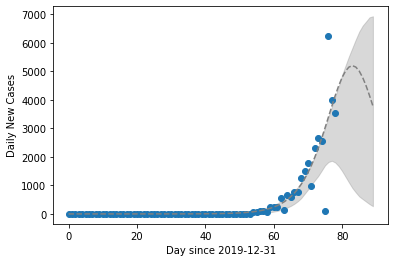

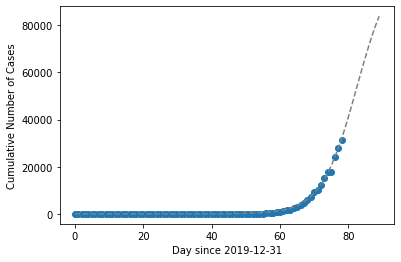

In [26]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5])